# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
# creating base urls for APIs
url = "http://api.openweathermap.org/data/2.5/weather?"

# For each city create URL and the API request
for city in cities:
    
    query_url = f'{url}appid={weather_api_key}&units=imperial&q={city}'
    city_weather = requests.get(query_url).json()
    
    try: 
        
        city_list.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        print(f'Processing {cities.index(city)}: {city}')
    except:
        print(f"We could not find {city}")
        pass

Processing 0: luderitz
Processing 1: ushuaia
We could not find falealupo
Processing 3: bredasdorp
Processing 4: mount gambier
Processing 5: cabo san lucas
Processing 6: ribeira grande
Processing 7: half moon bay
Processing 8: kangaatsiaq
Processing 9: lebu
Processing 10: omsukchan
Processing 11: kununurra
Processing 12: east london
Processing 13: margate
Processing 14: mataura
Processing 15: ucluelet
Processing 16: razole
Processing 17: tacuarembo
Processing 18: hilo
We could not find belushya guba
Processing 20: mar del plata
Processing 21: san quintin
Processing 22: chuy
Processing 23: tasiilaq
Processing 24: barrow
Processing 25: victoria
Processing 26: tilichiki
Processing 27: batagay-alyta
Processing 28: albany
Processing 29: ponta do sol
Processing 30: domoni
Processing 31: busselton
Processing 32: rosarito
Processing 33: porec
Processing 34: ilulissat
Processing 35: kruisfontein
Processing 36: okhotsk
Processing 37: champerico
Processing 38: sao filipe
Processing 39: kavieng
Pro

Processing 324: cayenne
Processing 325: almaznyy
We could not find amderma
Processing 327: afua
Processing 328: gandajika
Processing 329: codrington
Processing 330: puerto colombia
Processing 331: geraldton
Processing 332: suntar
Processing 333: humboldt
Processing 334: katangli
Processing 335: hami
Processing 336: comonfort
Processing 337: casablanca
Processing 338: astana
Processing 339: eskilstuna
Processing 340: portalegre
Processing 341: gorodets
Processing 342: belmonte
Processing 343: dongsheng
Processing 344: mitsamiouli
Processing 345: warren
Processing 346: senekal
Processing 347: manta
Processing 348: am timan
Processing 349: coihaique
Processing 350: maues
Processing 351: buraydah
Processing 352: utete
Processing 353: seymchan
Processing 354: lasa
We could not find bababe
Processing 356: high level
Processing 357: flinders
Processing 358: lagoa
Processing 359: damnagar
Processing 360: fortuna
Processing 361: coquimbo
Processing 362: vila velha
Processing 363: zhuhai
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# making dataframe to store weather data
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Cloudiness": cloudiness, 
    "Country": country, 
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
})
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lüderitz,0,NA,1612824397,54,-26.6481,15.1594,71.15,20.67
1,Ushuaia,0,AR,1612824397,59,-54.8000,-68.3000,64.40,11.50
2,Bredasdorp,5,ZA,1612824397,88,-34.5322,20.0403,62.60,2.30
3,Mount Gambier,0,AU,1612824397,77,-37.8333,140.7667,57.20,13.80
4,Cabo San Lucas,1,MX,1612824239,56,22.8909,-109.9124,75.00,4.61
...,...,...,...,...,...,...,...,...,...
553,Tura,0,IN,1612824460,49,25.5198,90.2201,56.73,2.73
554,Taiping,20,MY,1612824460,88,4.8500,100.7333,77.00,3.44
555,Jieshi,97,CN,1612824460,67,22.8134,115.8257,64.99,1.01
556,Chiavari,100,IT,1612824460,91,44.3201,9.3220,51.01,6.11


In [7]:
# exporting to a csv file
city_weather_df.to_csv("cities.csv", encoding="utf-8", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df['Humidity'].max()

100

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(city_weather_df.loc[city_weather_df['Humidity'] > 100].index, inplace=False)

In [10]:
# checking the new cleaned dataset
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lüderitz,0,NA,1612824397,54,-26.6481,15.1594,71.15,20.67
1,Ushuaia,0,AR,1612824397,59,-54.8000,-68.3000,64.40,11.50
2,Bredasdorp,5,ZA,1612824397,88,-34.5322,20.0403,62.60,2.30
3,Mount Gambier,0,AU,1612824397,77,-37.8333,140.7667,57.20,13.80
4,Cabo San Lucas,1,MX,1612824239,56,22.8909,-109.9124,75.00,4.61
...,...,...,...,...,...,...,...,...,...
553,Tura,0,IN,1612824460,49,25.5198,90.2201,56.73,2.73
554,Taiping,20,MY,1612824460,88,4.8500,100.7333,77.00,3.44
555,Jieshi,97,CN,1612824460,67,22.8134,115.8257,64.99,1.01
556,Chiavari,100,IT,1612824460,91,44.3201,9.3220,51.01,6.11


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

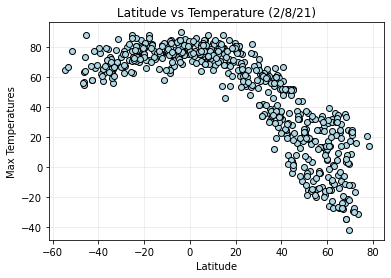

In [24]:
# scatter plot of latitude vs temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Temperature (2/8/21)')
plt.ylabel('Max Temperatures')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsTemp.png')
plt.show()

This plot is showing that highest temperatures seem to be closest to the equator, and the farther north you go the colder it gets while the farther south you go the warmer it gets.

## Latitude vs. Humidity Plot

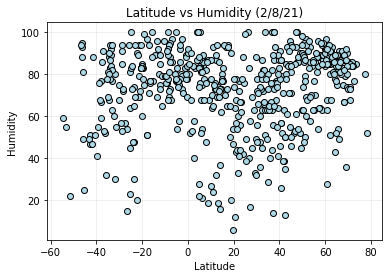

In [25]:
# scatter plot of latitude vs humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Humidity (2/8/21)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsHumidity.png')
plt.show()

There does not seem to be any strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

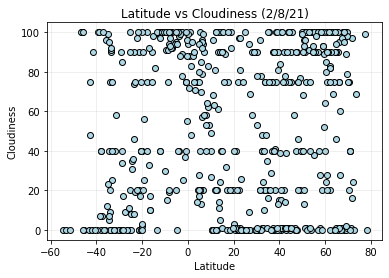

In [26]:
# scatter plot of latitude vs Cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Cloudiness (2/8/21)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsCloud.png')
plt.show()

From this plot it seems that cloudiness is not affected by the latitude and is evenly dispersed.  

## Latitude vs. Wind Speed Plot

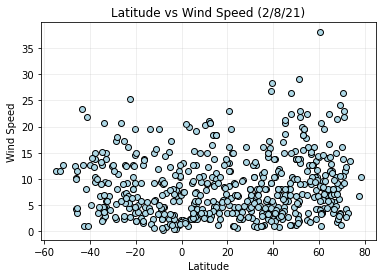

In [27]:
# scatter plot of latitude vs Wind speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Wind Speed (2/8/21)')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsWind.png')
plt.show()

This plot shows that wind speed widely distributed across the latitude.

## Linear Regression

In [15]:
# creating dataFrames of the northern and southern hemispheres to make it easier for analysis 
north_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

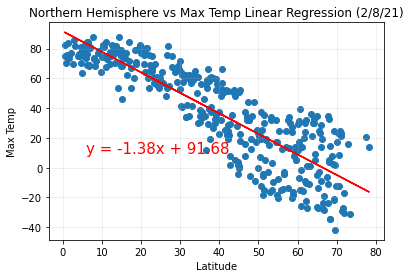

The r-value is: -0.87


In [28]:
# Linear Regression for north hemisphere and max temperature
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Max Temp Linear Regression (2/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(alpha=.25)

plt.savefig('../Images/northHemisphere_vs_temp.png')
plt.show()                     
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a strong, negative correlation between the northern hemisphere and max temperature indicating the more north you go away from the equator the colder the max temp is going to be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

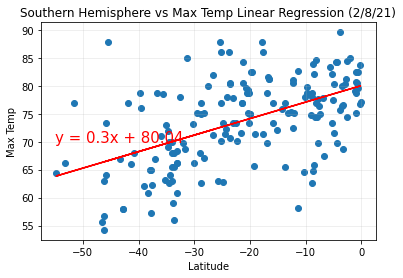

The r-value is: 0.53


In [29]:
# Linear Regression for south hemisphere and max temperature
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Max Temp Linear Regression (2/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(alpha=.25)

plt.savefig('../Images/southHemisphere_vs_temp.png')
plt.show()   
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is only a moderately strong, positive correlation between the southern hemisphere and max temperature.  This indicates that the more south you go it will likely get warmer.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

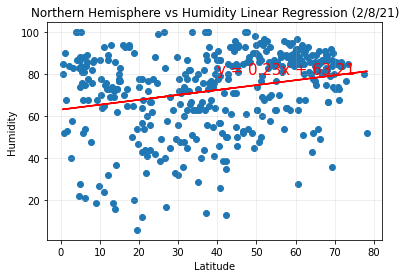

The r-value is: 0.25


In [30]:
# Linear Regression for north hemisphere and humidity
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,80),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Humidity Linear Regression (2/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.25)

plt.savefig('../Images/northHemisphere_vs_humidity.png')
plt.show()   
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a weak positive correlation between northern hemisphere and humidity levels, since it is weak we can't conclude much from it. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

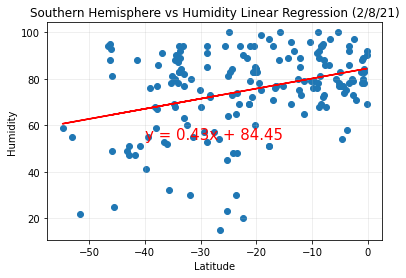

The r-value is: 0.34


In [31]:
# Linear Regression for south hemisphere and humidity
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,54),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Humidity Linear Regression (2/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.25)

plt.savefig('../Images/southHemisphere_vs_humidity.png')
plt.show()  
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a very weak, positive correlation between the southern hemisphere and humidity levels, from this we can conclude no relationship between the two. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

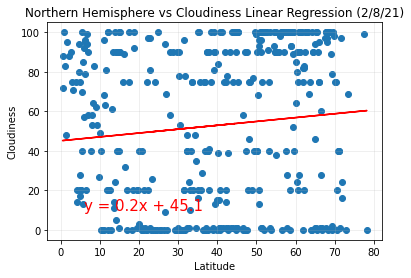

The r-value is: 0.1


In [32]:
# Linear Regression for north hemisphere and cloudiness
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Cloudiness Linear Regression (2/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=.25)

plt.savefig('../Images/northHemisphere_vs_cloudiness.png')
plt.show()   
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a very weak, positive correlation between the northern hemisphere and cloudiness levels. From this we can't conclude a relationship beteween the two. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

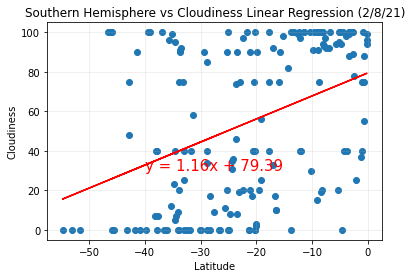

The r-value is: 0.4


In [33]:
# Linear Regression for south hemisphere and cloudiness
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Cloudiness Linear Regression (2/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=.25)

plt.savefig('../Images/southHemisphere_vs_cloudiness.png')
plt.show()   
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a moderately strong, positive correlation between the southern hemisphere and cloudiness levels. But from this we can't truly conclude a strong relationship between the two.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

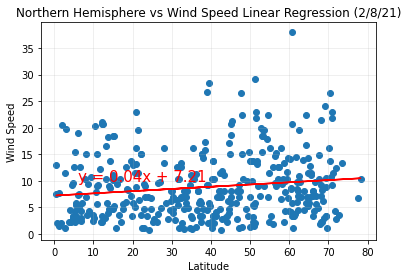

The r-value is: 0.14


In [34]:
# Linear Regression for north hemisphere and wind speed
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Wind Speed Linear Regression (2/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=.25)

plt.savefig('../Images/northHemisphere_vs_wind.png')
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see there is a very weak, positive correlation between the nothern hemisphere and wind speed.  From this we can't conclude any relationship between the two because it is so weak. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

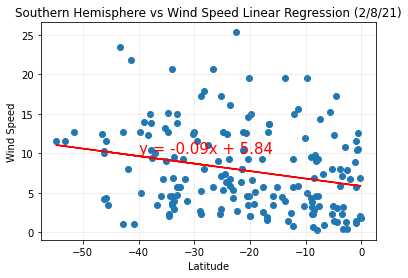

The r-value is: -0.24


In [35]:
# Linear Regression for south hemisphere and wind speed
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Wind Speed Linear Regression (2/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=.25)

plt.savefig('../Images/southHemisphere_vs_wind.png')
plt.show()
print(f"The r-value is: {round(rvalue, 2)}")

From the scatter plot and r-value we can see that there is a very weak, negative correlation between the southern hemisphere and wind speed. From this we can't conclude any relationship between the two.

## Three Observable Trends
* One of the strongest correlations I found was between the northern hemisphere and max temp, indicating that the higher north you go from the equator the colder the max temp will be. 
* When observing the latitude vs temperature plot we can find a similar conclusion, in that the more north the city the colder the max temp was, while the more south the max temp stayed consistently high. 
* When looking at cloudiness levels based on latitude we can see there is no strong relationship, neither positive or negative between the two variables. 